In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('..')
import prosumpy as pros


## Load example demand and photovoltaic profile

In [2]:
demand = pd.read_csv('./tests/data/demand_example.csv', index_col=0, header=None, parse_dates=True, squeeze=True)
pv_1kW = pd.read_csv('./tests/data/pv_example.csv', index_col=0, header=None, parse_dates=True, squeeze=True)


## Dispatch

We define some technical parameters needed for the dispatch

In [3]:
pv_size = 10

param_tech = {'BatteryCapacity': 20,
              'BatteryEfficiency': .9,
              'InverterEfficiency': .85,
              'timestep': .25,
              'MaxPower': 10
             }

pv = pv_1kW * pv_size

The photovoltaic and battery installation is covering the energy demand based on a given operation strategy. 

### Operation strategy 1
In this case the algorithm tries to maximize the self consumption.

In [4]:
E1 = pros.dispatch_max_sc(pv, demand, param_tech, return_series=False)


The solution is a dictionary that contains all energy flows:

In [5]:
E1.keys()

dict_keys(['pv2inv', 'res_pv', 'pv2store', 'inv2load', 'grid2load', 'store2inv', 'LevelOfCharge', 'inv2grid'])

#### Inspect results of strategy 1

We can have a quick overview on the results

In [6]:
pros.print_analysis(pv, demand, param_tech, E1)

Total yearly consumption: 9.02e+03 kWh
Total PV production: 1.56e+04 kWh
Self Consumption: 7.59e+03 kWh
Total fed to the grid: 5.64e+03 kWh
Total bought from the grid: 1.43e+03 kWh
Self consumption rate (SCR): 48.7%
Self sufficiency rate (SSR): 84.2%
Amount of energy provided by the battery: 5.11e+03 kWh
Average Charging/Discharging depth: 0.7
Number of equivalent full cycles per year: 255 
Total battery losses: 0 kWh
Total inverter losses: 2.33e+03 kWh
Residue (check): 1.82e-12 kWh


We can inspect the dispatch by plotting the energy flows of any given week 

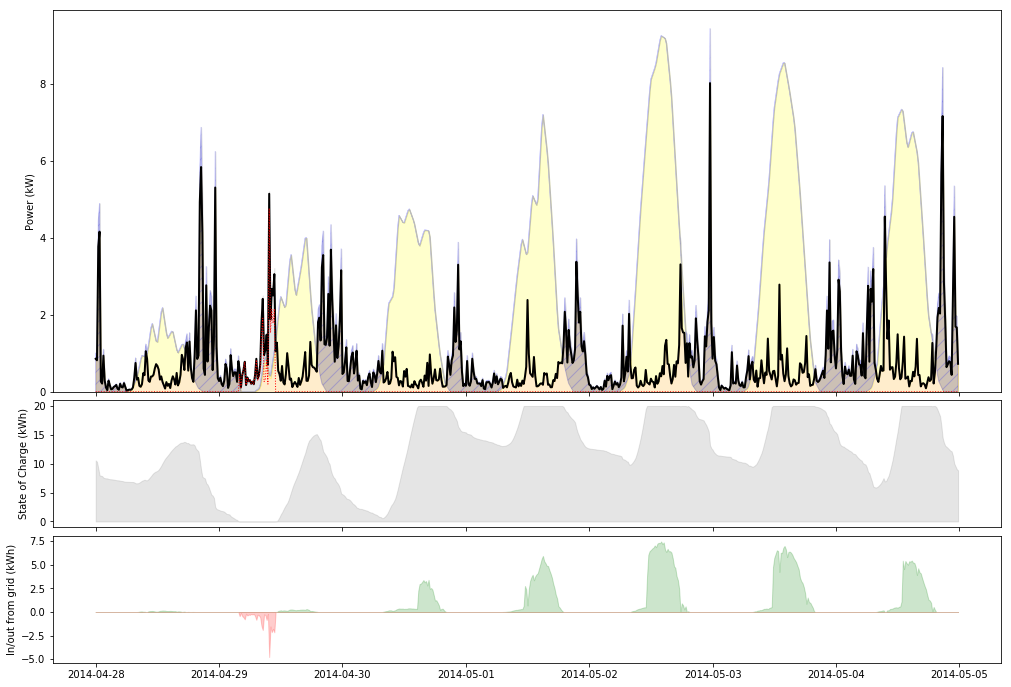

In [7]:
pros.plot_dispatch(pv, demand, E1, week=18)

### Operation stratetegy # 2
The use of battery for every day is preoptimized assuming perfect forecast of the demand. The advantage of this strategy is that it avoids sudden sudden power injections to the grid.

In [7]:
E2 = pros.dispatch_max_sc_grid_pf(pv, demand, param_tech)


### Inspect results of strategy 2

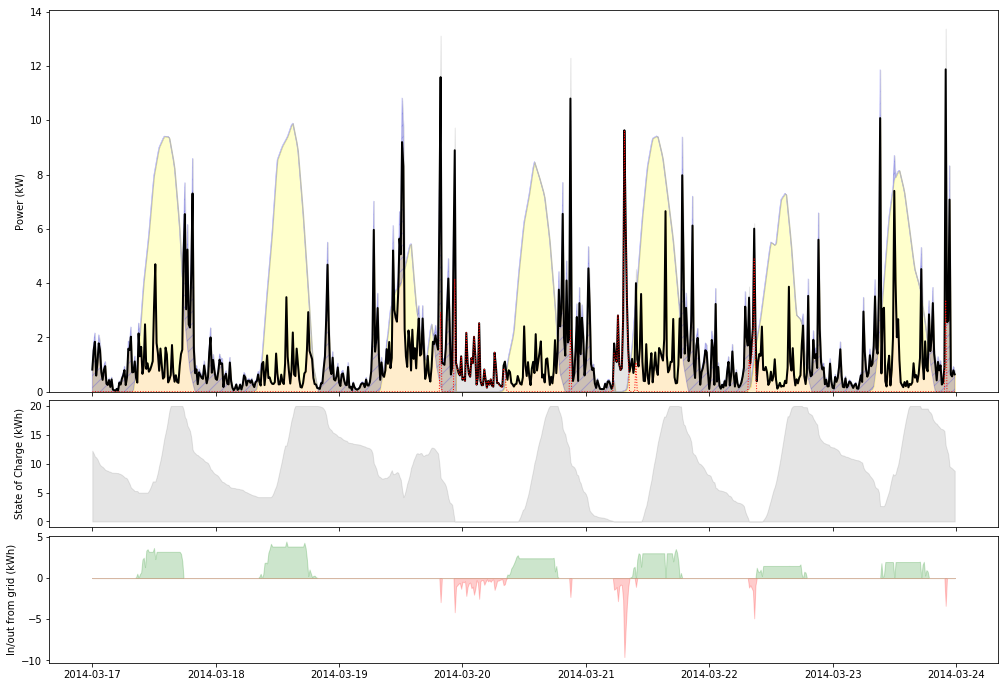

In [11]:
pros.plot_dispatch(pv, demand, E2, week=12)

In [12]:
pros.print_analysis(pv, demand, param_tech, E2)

Total yearly consumption: 9.02e+03 kWh
Total PV production: 1.56e+04 kWh
Self Consumption: 7.68e+03 kWh
Total fed to the grid: 4.57e+03 kWh
Total bought from the grid: 1.34e+03 kWh
Self consumption rate (SCR): 49.3%
Self sufficiency rate (SSR): 85.2%
Amount of energy provided by the battery: 5.22e+03 kWh
Average Charging/Discharging depth: 0.715
Number of equivalent full cycles per year: 261 
Total battery losses: -9.09e-13 kWh
Total inverter losses: 2.33e+03 kWh
Residue (check): 980 kWh
